In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd



df = pd.read_csv('/content/drive/MyDrive/CSE303 FILES/LAB 09 ,9 SEPT , LAB TASK/Heart_Attack_Risk_Prediction_Dataset_2.csv')
print(df)

print(df.head())

     Patient ID   Age     Sex  Cholesterol  Heart Rate  Diabetes  Smoking  \
0       BMW7812  67.0    Male          208          72         0        1   
1       CZE1114  21.0    Male          389          98         1        1   
2       BNI9906  21.0  Female          324          72         1        0   
3       JLN3497  84.0    Male          383          73         1        1   
4       GFO8847  66.0    Male          318          93         1        1   
...         ...   ...     ...          ...         ...       ...      ...   
8758    MSV9918  60.0    Male          121          61         1        1   
8759    QSV6764   NaN  Female          120          73         1        0   
8760    XKA5925  47.0    Male          250         105         0        1   
8761    EPE6801  36.0    Male          178          60         1        1   
8762    ZWN9666  25.0  Female          356          75         1        0   

      Alcohol Consumption  Exercise Hours Per Week       Diet  \
0         

In [3]:
print(df. columns)
df.info()

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Smoking', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Income',
       'BMI', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Continent', 'Heart Attack Risk'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8711 non-null   float64
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Smoking                   

In [4]:
duplicate = df[df.duplicated()]
duplicate

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Heart Attack Risk


In [5]:

df.isnull().sum()

,0
Patient ID,0
Age,52
Sex,0
Cholesterol,0
Heart Rate,0
Diabetes,0
Smoking,0
Alcohol Consumption,0
Exercise Hours Per Week,0
Diet,0


In [6]:
missing_value_of_heartAttack_data = df.isnull().mean()* 100

print(missing_value_of_heartAttack_data)

Patient ID                         0.000000
Age                                0.593404
Sex                                0.000000
Cholesterol                        0.000000
Heart Rate                         0.000000
Diabetes                           0.000000
Smoking                            0.000000
Alcohol Consumption                0.000000
Exercise Hours Per Week            0.000000
Diet                               0.000000
Previous Heart Problems            0.000000
Medication Use                     0.000000
Stress Level                       0.000000
Income                             0.285290
BMI                                0.513523
Physical Activity Days Per Week    0.353760
Sleep Hours Per Day                0.000000
Continent                          0.000000
Heart Attack Risk                  0.000000
dtype: float64


<Axes: >

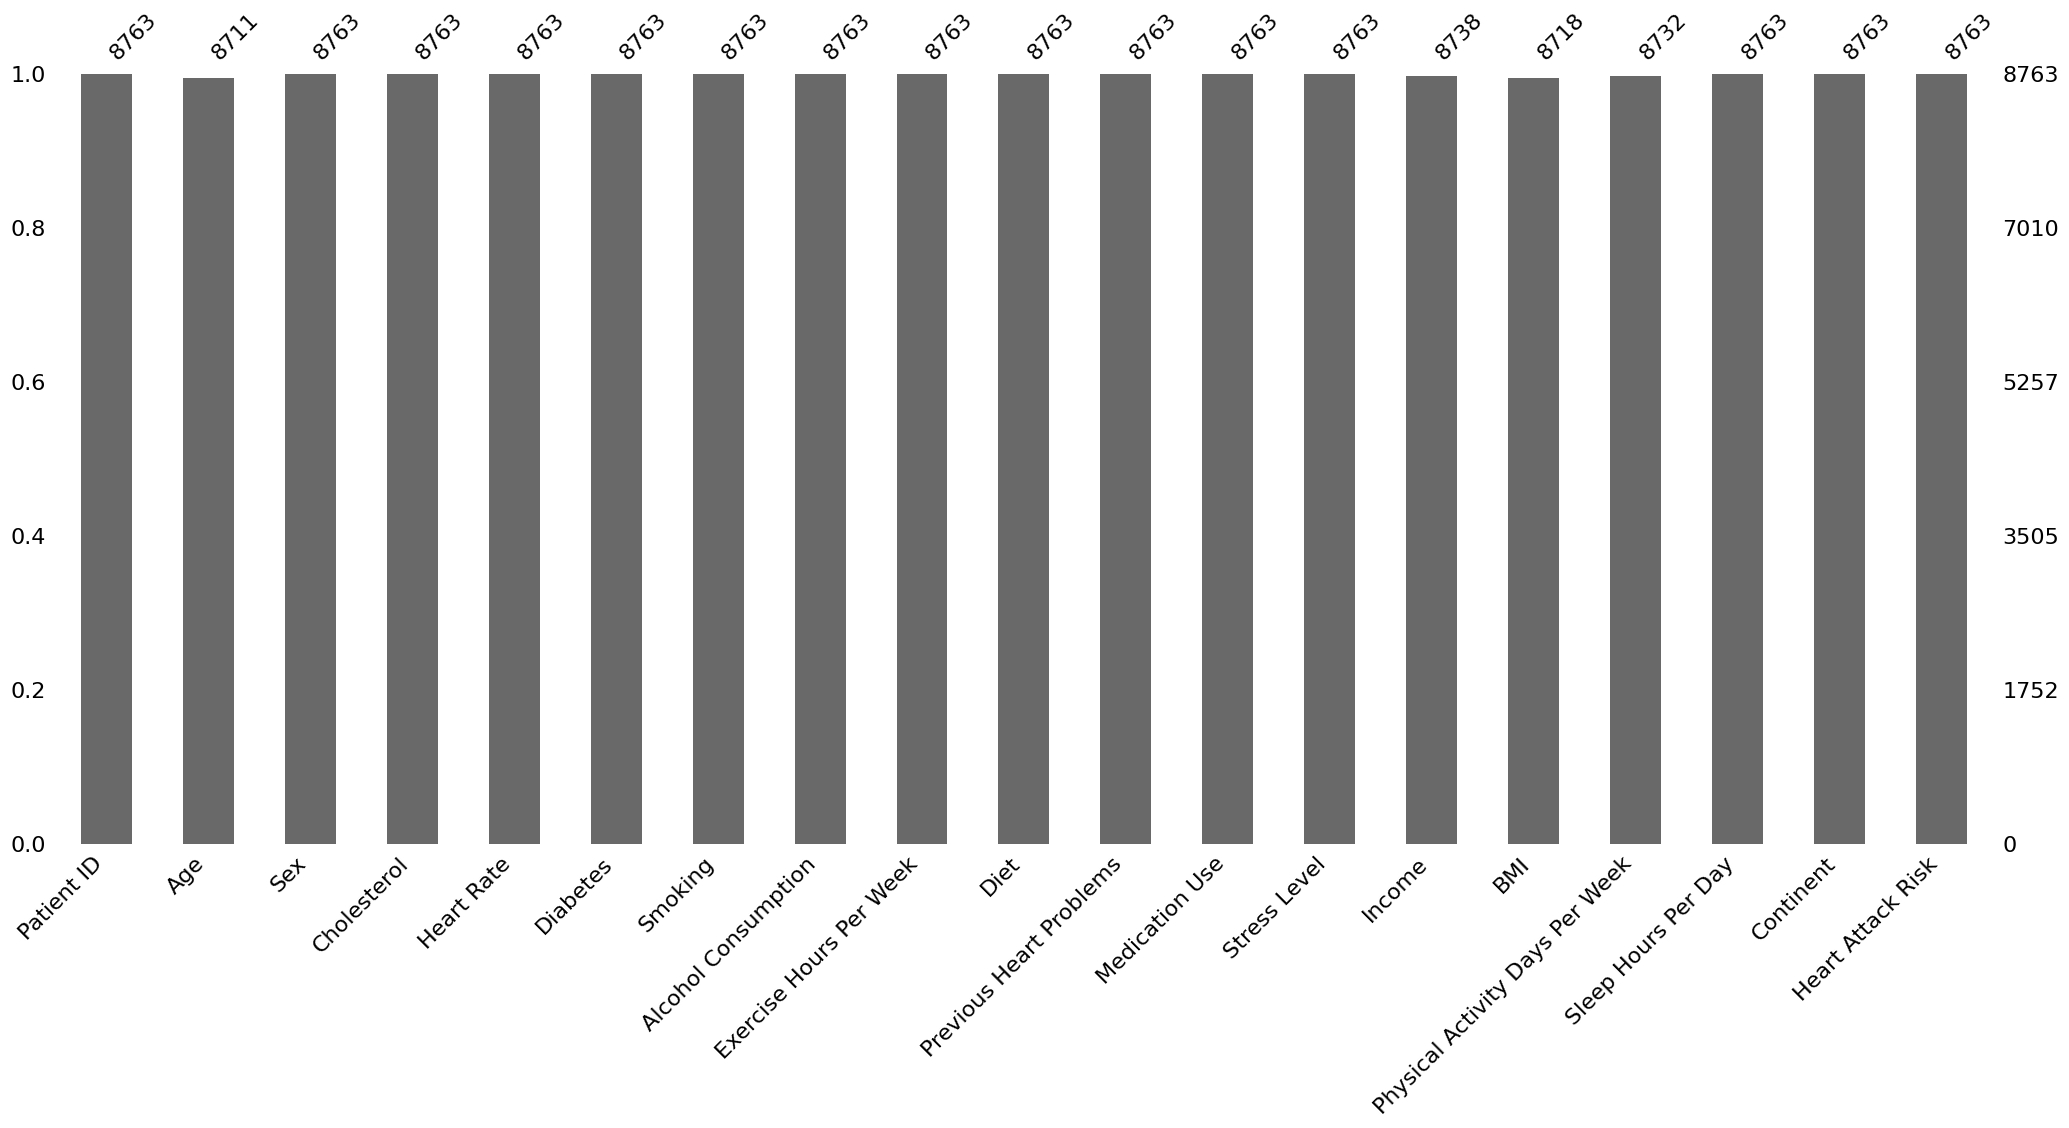

In [7]:
import missingno as msno
msno.bar(df)

In [12]:
#checking outlier in Age
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Age'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [17]:
median_value = df['Age'].median()
print( median_value)

54.0


In [18]:
median_value_income = df['Income'].median()
print( median_value_income)

157827.5


In [20]:
median_value_BMI = df['BMI'].median()
print( median_value_BMI)

28.77594224


In [21]:
median_value_PhysicalActivity = df['Physical Activity Days Per Week'].median()
print( median_value_PhysicalActivity)

3.0


In [22]:

#replacing null with median value for all the missing values ______________

df['Age'] = df['Age'].fillna(median_value)
df.isnull().sum()
df['Income'] = df['Income'].fillna(median_value)
df.isnull().sum()
df['BMI'] = df['BMI'].fillna(median_value)
df.isnull().sum()
df['Physical Activity Days Per Week'] = df['Physical Activity Days Per Week'].fillna(median_value)
df.isnull().sum()

,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Heart Rate,0
Diabetes,0
Smoking,0
Alcohol Consumption,0
Exercise Hours Per Week,0
Diet,0


In [23]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Smoking,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.697364,259.877211,75.021682,0.652288,0.896839,0.598083,10.014284,0.495835,0.498345,5.469702,157752.264179,29.024207,3.667808,7.023508,0.358211
std,21.195575,80.863276,20.550948,0.476271,0.304186,0.490313,5.783745,0.500011,0.500026,2.859622,80911.598555,6.554008,3.766556,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,54.000000,18.002337,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,1.000000,0.000000,4.981579,0.000000,0.000000,3.000000,87361.500000,23.443378,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,157544.000000,28.814764,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,227514.000000,34.415443,6.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,299954.000000,54.000000,54.000000,10.000000,1.000000


<Axes: >

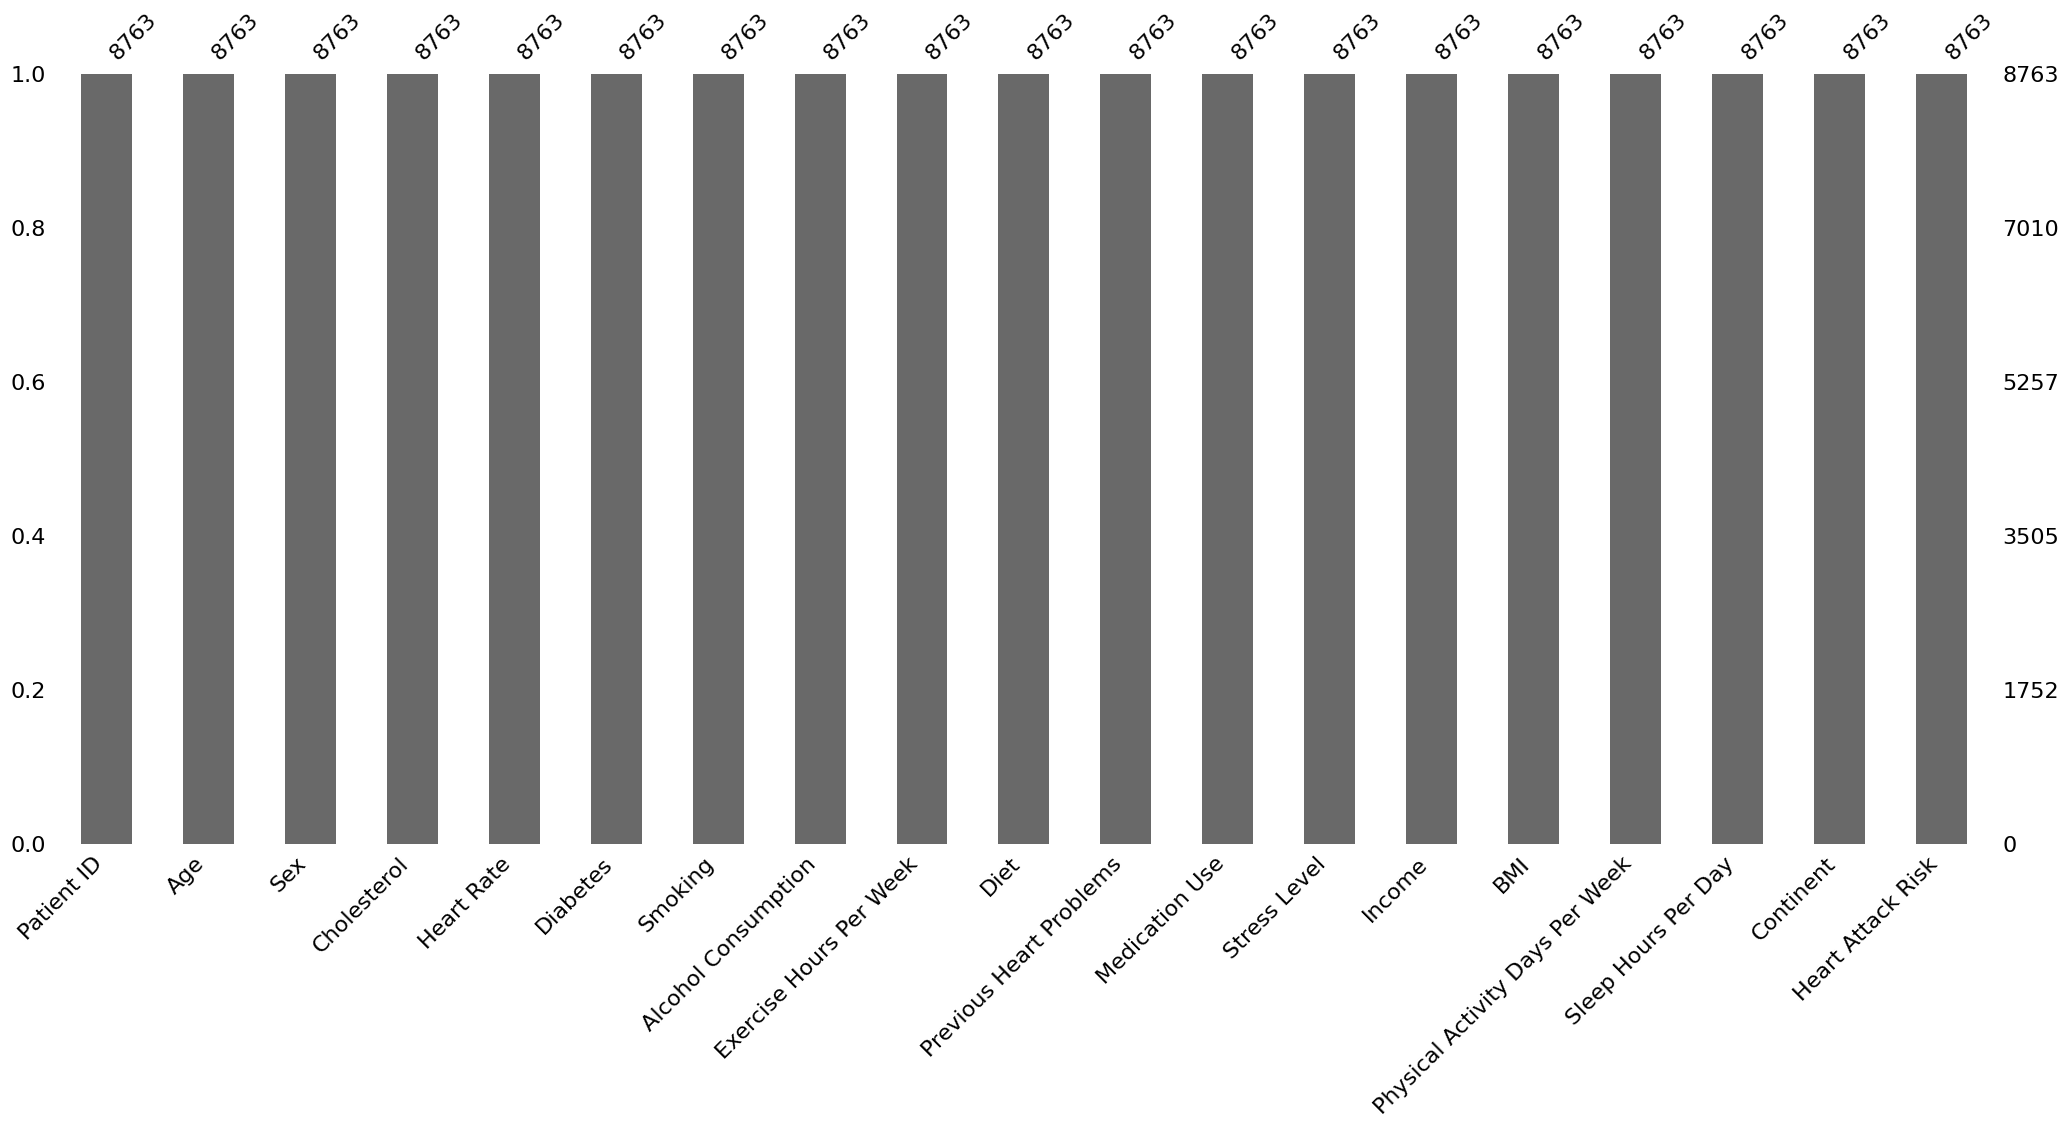

In [24]:
# Visualisation

import missingno as msno
msno.bar(df)

In [25]:
# Creating a new column 'Sex_No' with the values '1' for 'MALE' and '0' for 'FEMALE'
df['Sex_No'] = np.where((df['Sex'] == "Male"), 1, 0)


# Checking if the column 'Sex_No' has been added
df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Heart Attack Risk,Sex_No
0,BMW7812,67.0,Male,208,72,0,1,0,4.168189,Average,0,0,9,261404.0,31.251233,0.0,6,South America,0,1
1,CZE1114,21.0,Male,389,98,1,1,1,1.813242,Unhealthy,1,0,1,285768.0,27.194973,1.0,7,North America,0,1
2,BNI9906,21.0,Female,324,72,1,0,0,2.078353,Healthy,1,1,9,235282.0,28.176571,4.0,4,Europe,0,0
3,JLN3497,84.0,Male,383,73,1,1,1,9.828130,Average,1,0,9,125640.0,36.464704,3.0,4,North America,0,1
4,GFO8847,66.0,Male,318,93,1,1,0,5.804299,Unhealthy,1,0,6,160555.0,21.809144,1.0,5,Asia,0,1


In [27]:
df_correlation = df.copy()

In [28]:
df_correlation.drop(columns=['Sex','Diet','Continent','Patient ID'],inplace=True)

In [29]:
# Correlation table including the new column 'Sex_No'
correlation = df_correlation.corr()
correlation

,Age,Cholesterol,Heart Rate,Diabetes,Smoking,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Sex_No
Age,1.000000,-0.009320,-0.003971,-0.014088,0.393425,-0.007587,0.001566,0.001259,0.000513,0.019597,-0.004473,-0.003384,-0.003535,-0.002276,0.005132,0.019414
Cholesterol,-0.009320,1.000000,0.000315,-0.013428,0.016342,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.000131,0.018744,0.016308,0.004456,0.019340,0.007614
Heart Rate,-0.003971,0.000315,1.000000,0.006764,-0.012331,0.003459,0.008276,-0.004956,0.009244,-0.004547,0.003426,0.001110,-0.006216,0.001811,-0.004251,-0.010921
Diabetes,-0.014088,-0.013428,0.006764,1.000000,0.000527,0.005551,-0.007014,0.000867,-0.002656,0.006719,-0.000077,-0.008017,0.007368,-0.012457,0.017225,0.003582
Smoking,0.393425,0.016342,-0.012331,0.000527,1.000000,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.001640,0.009155,-0.002520,-0.005424,-0.004051,0.514837
Alcohol Consumption,-0.007587,-0.007261,0.003459,0.005551,0.012754,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.021704,0.010684,0.005069,-0.000843,-0.013778,0.002085
Exercise Hours Per Week,0.001566,0.021517,0.008276,-0.007014,-0.000150,-0.008514,1.000000,0.005253,-0.007119,-0.009102,-0.019933,-0.001403,0.012780,-0.001245,0.011133,-0.006976
Previous Heart Problems,0.001259,-0.006070,-0.004956,0.000867,-0.000574,0.010395,0.005253,1.000000,0.005336,-0.017629,-0.001995,0.012413,-0.002522,0.004460,0.000274,0.001964
Medication Use,0.000513,-0.000905,0.009244,-0.002656,-0.010877,0.003339,-0.007119,0.005336,1.000000,0.000863,-0.006353,0.006818,-0.002261,-0.020393,0.002234,-0.007148
Stress Level,0.019597,-0.024487,-0.004547,0.006719,-0.001757,-0.005023,-0.009102,-0.017629,0.000863,1.000000,-0.000735,-0.003048,0.002250,-0.014205,-0.004111,-0.021835


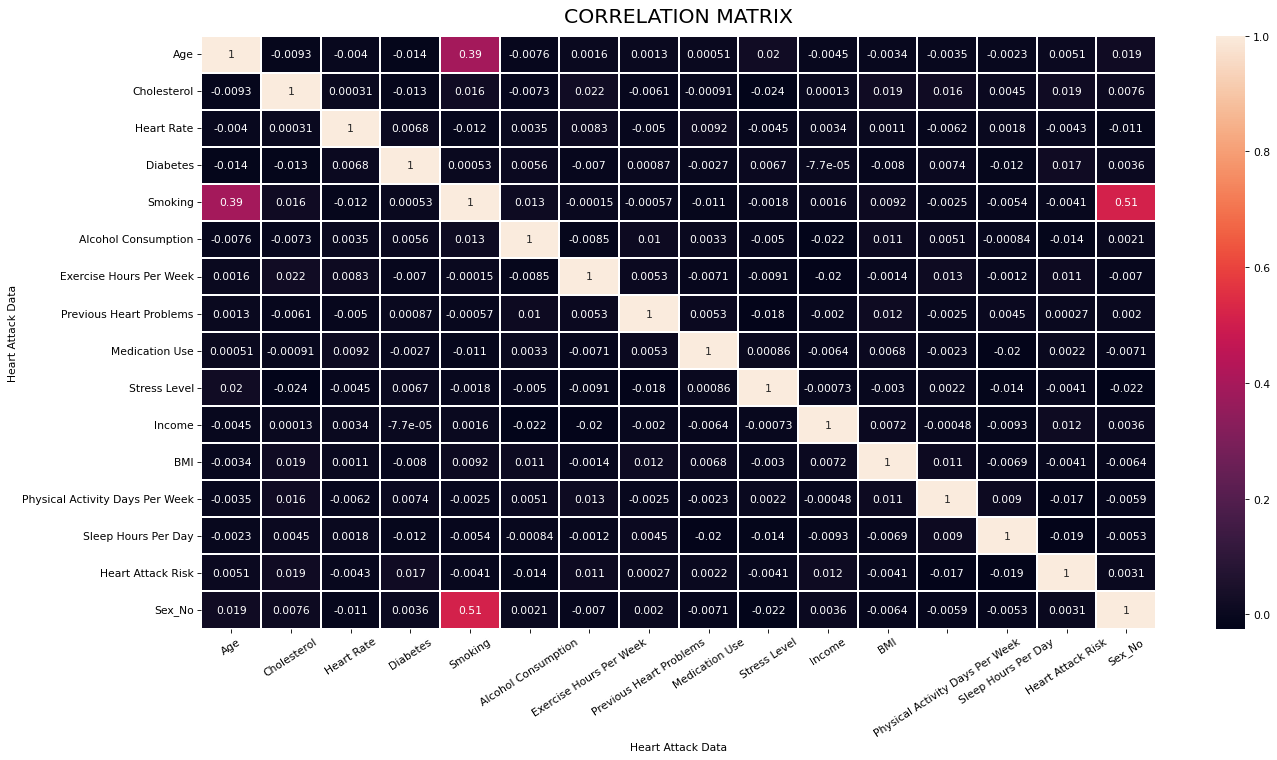

In [35]:
# Visualisation of the corralation table

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

plt.figure(figsize=(20,10), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Heart Attack Data')
plt.ylabel('Heart Attack Data')
plt.xticks(rotation=33)
plt.show()

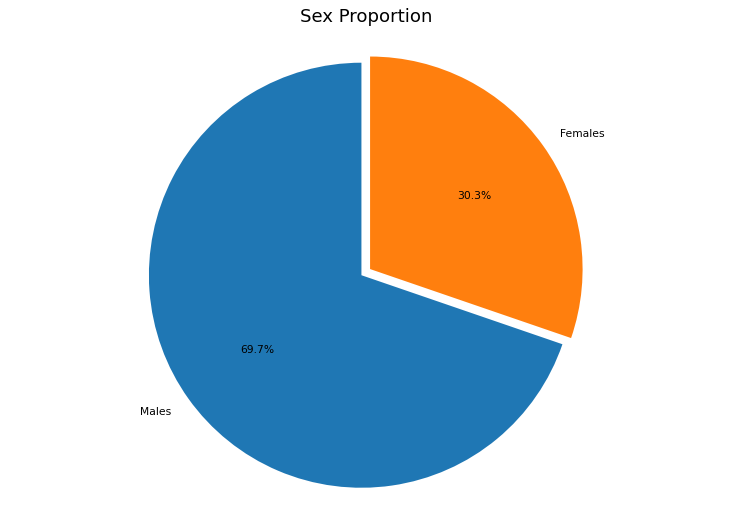

In [39]:
male = (df['Sex_No'] == 1).sum()
female = (df['Sex_No']== 0).sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

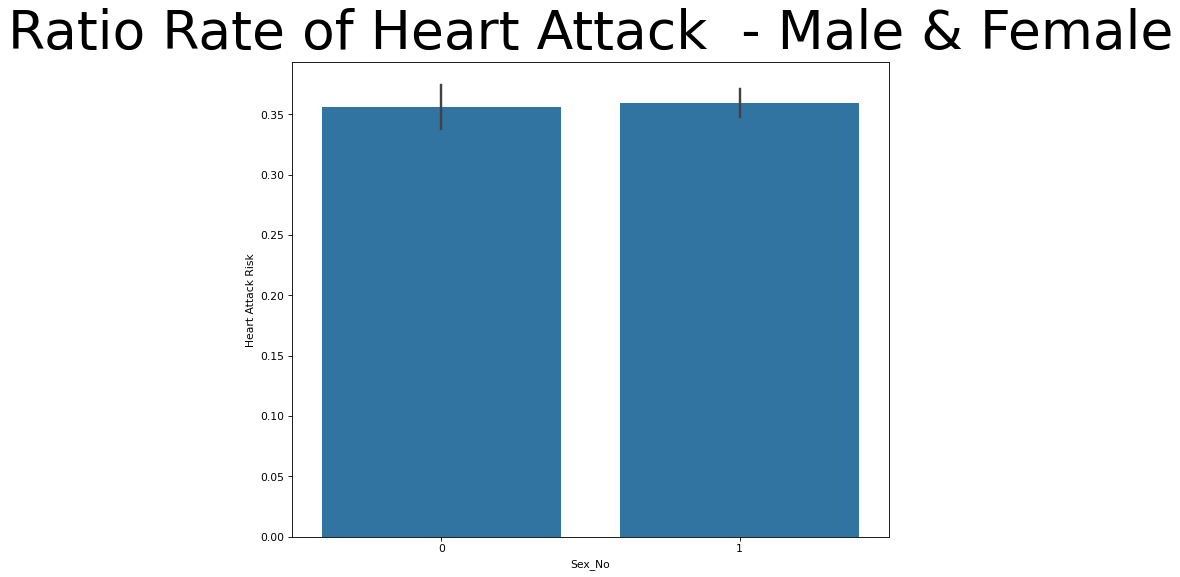

In [44]:
# bar chart sex by Heart Attack Risk

plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex_No", y="Heart Attack Risk", data=df)
plt.title("Ratio Rate of Heart Attack  - Male & Female", size=50, pad=13 )
plt.show()

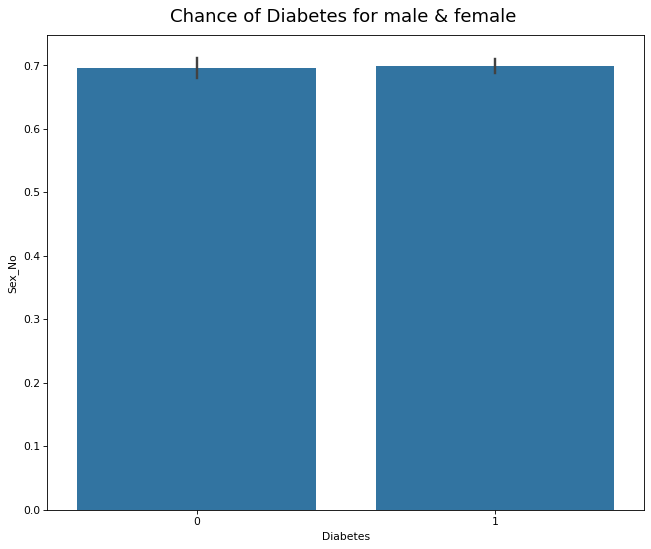

In [43]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Diabetes", y="Sex_No", data=df)
plt.title("Chance of Diabetes for male & female ", size=17, pad=13)
plt.show()

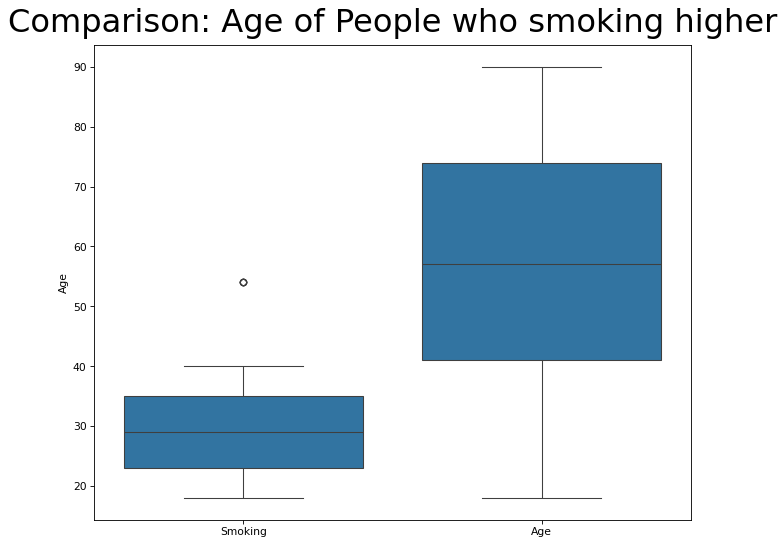

In [49]:
plt.figure(figsize=(10,8), dpi=77)
sns.boxplot(x="Smoking", y="Age", data=df)
plt.title("Comparison: Age of People who smoking higher", size=30, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Smoking', 'Age'])
plt.show()

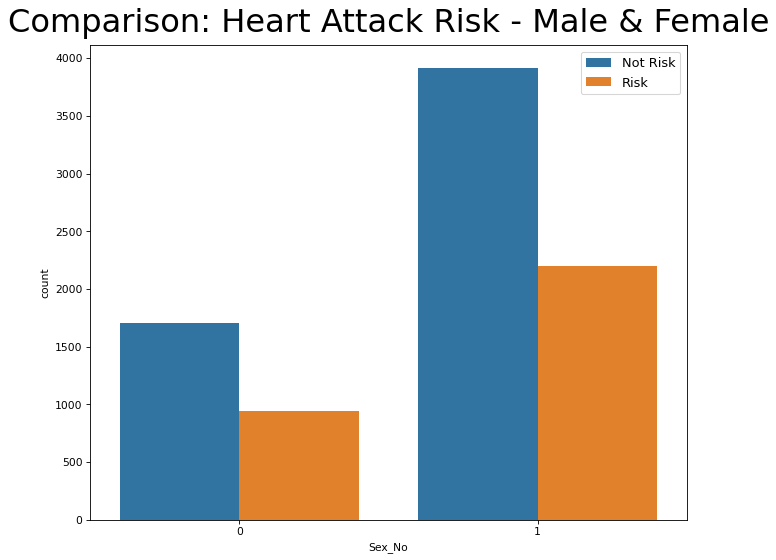

In [50]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex_No'],hue=df['Heart Attack Risk'])
plt.title("Comparison: Heart Attack Risk - Male & Female", size=30, pad= 13)
plt.legend(['Not Risk', 'Risk'], loc='upper right', prop={'size': 12})
plt.show()

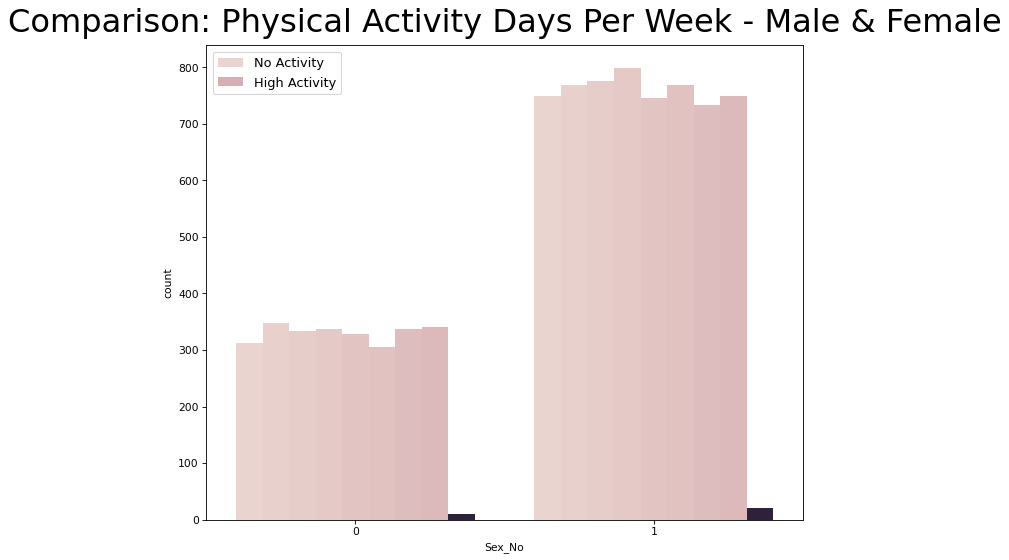

In [51]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex_No'],hue=df['Physical Activity Days Per Week'])
plt.title("Comparison: Physical Activity Days Per Week - Male & Female", size=30, pad=13)
plt.legend(['No Activity', 'High Activity'], loc='upper left', prop={'size': 12})
plt.show()

From the data we can see here , Males are more active than females.
Another analysis, we see males have more riskable in heart attack than females.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
x=df_correlation.drop('Heart Attack Risk',axis=1)
y=df_correlation['Heart Attack Risk']
reg.fit(x,y)

print(x)
print(y)

       Age  Cholesterol  Heart Rate  Diabetes  Smoking  Alcohol Consumption  \
0     67.0          208          72         0        1                    0   
1     21.0          389          98         1        1                    1   
2     21.0          324          72         1        0                    0   
3     84.0          383          73         1        1                    1   
4     66.0          318          93         1        1                    0   
...    ...          ...         ...       ...      ...                  ...   
8758  60.0          121          61         1        1                    1   
8759  54.0          120          73         1        0                    0   
8760  47.0          250         105         0        1                    1   
8761  36.0          178          60         1        1                    0   
8762  25.0          356          75         1        0                    1   

      Exercise Hours Per Week  Previous Heart Probl

In [53]:
# Splitting into Train and Test Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

       Age  Cholesterol  Heart Rate  Diabetes  Smoking  Alcohol Consumption  \
8361  45.0          228         106         1        1                    0   
2244  20.0          271          96         1        1                    0   
5530  75.0          367         100         1        1                    1   
322   25.0          162          93         1        1                    1   
4688  77.0          336          91         0        1                    0   
...    ...          ...         ...       ...      ...                  ...   
4373  36.0          228          92         0        1                    1   
7891  19.0          266          51         0        1                    1   
4859  67.0          254         107         1        1                    0   
3264  51.0          399          97         1        1                    0   
2732  37.0          272          44         0        1                    1   

      Exercise Hours Per Week  Previous Heart Probl

In [54]:
# Fitting the dataset into Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predicting the values of the Test Set

y_pred = regressor.predict(X_test)
print(y_pred)

[0.33860188 0.33123675 0.32823629 ... 0.34618227 0.35377229 0.39364883]


In [59]:
   #logistic

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
x=df_correlation.drop('Heart Attack Risk',axis=1)
y=df_correlation['Heart Attack Risk']

reg.fit(x,y)

LogisticRegression()

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

       Age  Cholesterol  Heart Rate  Diabetes  Smoking  Alcohol Consumption  \
8361  45.0          228         106         1        1                    0   
2244  20.0          271          96         1        1                    0   
5530  75.0          367         100         1        1                    1   
322   25.0          162          93         1        1                    1   
4688  77.0          336          91         0        1                    0   
...    ...          ...         ...       ...      ...                  ...   
4373  36.0          228          92         0        1                    1   
7891  19.0          266          51         0        1                    1   
4859  67.0          254         107         1        1                    0   
3264  51.0          399          97         1        1                    0   
2732  37.0          272          44         0        1                    1   

      Exercise Hours Per Week  Previous Heart Probl

In [61]:
y_pred = reg.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6382655001901864

In [63]:
#  tuning = 1

from sklearn.linear_model import LogisticRegression
reg_tune = LogisticRegression(penalty='none',random_state=0)
reg_tune.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', random_state=0)

In [64]:
y_pred1 = reg_tune.predict(x_test)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.6382655001901864

In [66]:
# tunning model = 2
from sklearn.linear_model import LogisticRegression
reg_tune2 = LogisticRegression(penalty='none',random_state=0)
reg_tune2.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', random_state=0)

In [67]:
y_pred2 = reg_tune2.predict(x_test)
print(y_pred2)

[0 0 0 ... 0 0 0]


In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.6382655001901864

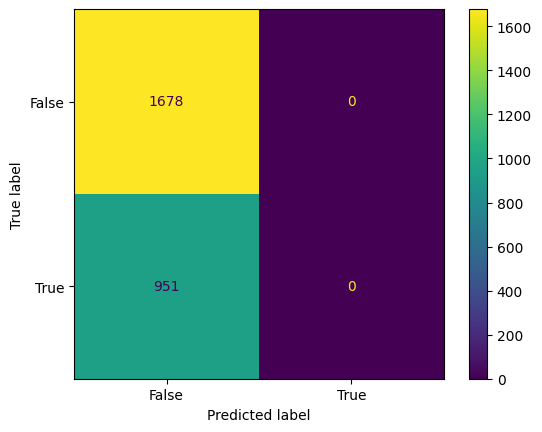

In [69]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()